<a href="https://colab.research.google.com/github/jeochris/DL-Study/blob/main/Demo1_tensorflow_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from platform import python_version

print(python_version())

3.8.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Example 1: Linear Regression
# 1.1 Importing tensorflow and other libraries.
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

[1.0435413e-01 4.6034902e-01 2.4801269e-01 5.4228675e-01 2.6917958e-01
 1.7835075e-01 5.0097555e-01 4.2145796e-02 4.6714344e-03 7.1284550e-01
 4.3231553e-01 2.1137920e-01 3.8617906e-01 9.2192477e-01 2.4539059e-01
 1.4302139e-01 8.9561087e-01 7.8969359e-01 1.1559345e-02 6.5079474e-01
 7.1176670e-02 5.0604147e-01 7.4600857e-01 8.5831893e-04 5.4963153e-02
 5.0429434e-01 4.9350131e-01 3.6951751e-01 4.5162159e-01 3.5369318e-02
 4.5525152e-02 7.7983493e-01 4.1728267e-01 6.7523187e-01 7.8212625e-01
 3.1683442e-01 6.0897034e-01 9.0235227e-01 4.1036507e-01 1.3978064e-01
 6.4654344e-01 1.1423544e-02 1.3331442e-01 5.1332384e-01 7.2238451e-01
 7.5021476e-01 5.6679063e-02 7.3551112e-01 2.4703071e-01 6.7870122e-01
 4.2629845e-02 1.4989302e-01 2.9565516e-01 3.8462747e-02 4.4551483e-01
 2.5638404e-01 8.9743900e-01 1.6377461e-01 5.2217826e-02 3.6913007e-01
 1.8436366e-01 9.1540807e-01 5.7484829e-01 7.7495736e-01 8.4653533e-01
 8.1768477e-01 2.4490805e-01 6.9034129e-01 7.7944183e-01 6.3696986e-01
 8.720

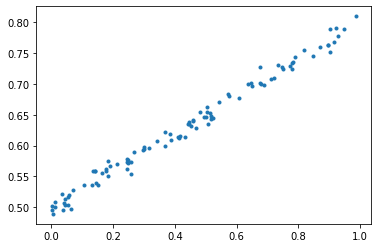

In [ ]:
# 1.2 Creating input data using NumPy. y = x * 0.3 + 0.5 + noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
print(x_data)
y_data = 0.3 * x_data + 0.5 + noise

pylab.plot(x_data, y_data, '.')

In [ ]:
# 1.3 Building inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random.uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

print(W)
print(b)
print(y)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3619157], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>
tf.Tensor(
[3.77673991e-02 1.66607544e-01 8.97596851e-02 1.96262091e-01
 9.74203199e-02 6.45479336e-02 1.81310922e-01 1.52532253e-02
 1.69066549e-03 2.57989973e-01 1.56461775e-01 7.65014514e-02
 1.39764264e-01 3.33659053e-01 8.88107121e-02 5.17616868e-02
 3.24135631e-01 2.85802513e-01 4.18350846e-03 2.35532835e-01
 2.57599559e-02 1.83144361e-01 2.69992232e-01 3.10639094e-04
 1.98920276e-02 1.82512045e-01 1.78605869e-01 1.33734196e-01
 1.63448945e-01 1.28007121e-02 1.64762679e-02 2.82234520e-01
 1.51021153e-01 2.44377017e-01 2.83063769e-01 1.14667356e-01
 2.20395938e-01 3.26575458e-01 1.48517564e-01 5.05888090e-02
 2.33994231e-01 4.13436024e-03 4.82485816e-02 1.85779959e-01
 2.61442304e-01 2.71514505e-01 2.05130428e-02 2.66193032e-01
 8.94042924e-02 2.45632634e-01 1.54284108e-02 5.42486385e-02
 1.07002243e-01 1

In [ ]:
# 1.4 Defining forward function and building training graph
def forward(x):
    return W * x + b

learning_rate=0.5
optimizer = tf.keras.optimizers.Adam(learning_rate)
loss_fn = tf.keras.losses.MeanSquaredError()

y_initial_values = y # Save initial values for plotting later.

def train_step(inputs):
    with tf.GradientTape() as tape:
        y_pred = forward(inputs)
        loss = loss_fn(y_data, y_pred)

    gradients = tape.gradient(loss, [W,b])
    optimizer.apply_gradients(zip(gradients, [W,b])) #
    return loss

In [ ]:
# 1.5 Performing training and check forwarded ouputs after 200th iteration
for step in range(201):
    loss = train_step(x_data)
    if step % 20 == 0:
        print("#%s \t W: %s b: %s loss: %s" % (step, W.numpy(), b.numpy(), loss.numpy()))
print(forward(x_data))

#0 	 W: [0.8619118] b: [0.4999983] loss: 0.22450554
#20 	 W: [0.2891369] b: [0.62026435] loss: 0.020236606
#40 	 W: [0.31607] b: [0.4890266] loss: 0.0011168433
#60 	 W: [0.30284855] b: [0.4903048] loss: 0.0004201334
#80 	 W: [0.29506463] b: [0.5003425] loss: 0.00010247419
#100 	 W: [0.30211693] b: [0.50091016] loss: 9.464197e-05
#120 	 W: [0.30253008] b: [0.49966222] loss: 8.928131e-05
#140 	 W: [0.301788] b: [0.49937037] loss: 8.860892e-05
#160 	 W: [0.30149823] b: [0.4993563] loss: 8.85222e-05
#180 	 W: [0.30155116] b: [0.49946767] loss: 8.852006e-05
#200 	 W: [0.3015269] b: [0.49944377] loss: 8.851984e-05
tf.Tensor(
[0.53090936 0.63825136 0.57422626 0.6629578  0.58060867 0.55322134
 0.6505014  0.51215184 0.50085235 0.71438587 0.62979853 0.56318027
 0.61588717 0.77742887 0.57343566 0.54256856 0.76949453 0.73755765
 0.5029292  0.6956759  0.52090544 0.6520289  0.72438544 0.49970257
 0.51601666 0.6515021  0.6482477  0.6108632  0.6356198  0.5101086
 0.51317084 0.734585   0.6252657  0.703

(0.0, 1.5)

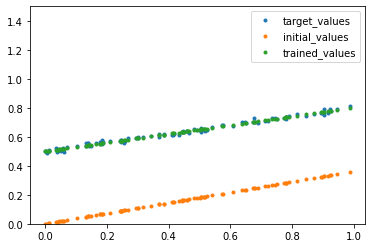

In [ ]:
# 1.6 Comparing the initial regression line with the trained values.
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, ".", label="initial_values")
pylab.plot(x_data, forward(x_data), ".", label="trained_values")
pylab.legend()
pylab.ylim(0, 1.5)